In [1]:
import pandas as pd


In [2]:
df_demanda = pd.read_excel('Dataton 2023 Etapa 1.xlsx', sheet_name="demand")
df_workers = pd.read_excel('Dataton 2023 Etapa 1.xlsx', sheet_name="workers")

df_demanda

,suc_cod,fecha_hora,demanda
0,60,2024-04-22 07:30:00,2
1,60,2024-04-22 07:45:00,2
2,60,2024-04-22 08:00:00,4
3,60,2024-04-22 08:15:00,7
4,60,2024-04-22 08:30:00,8
5,60,2024-04-22 08:45:00,8
6,60,2024-04-22 09:00:00,9
7,60,2024-04-22 09:15:00,8
8,60,2024-04-22 09:30:00,6
9,60,2024-04-22 09:45:00,8


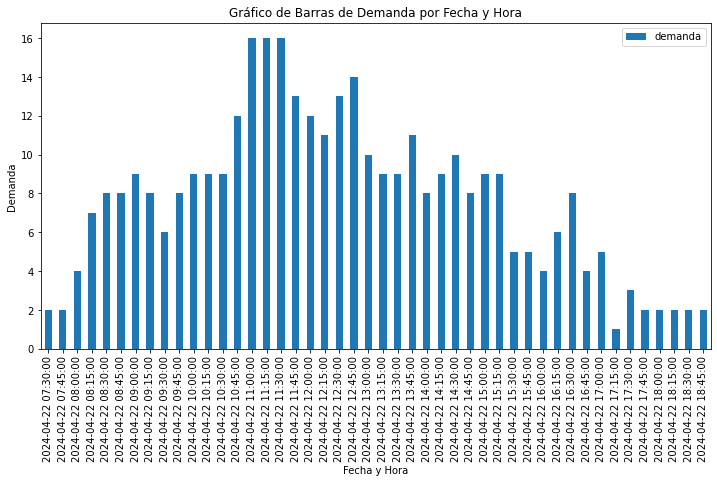

In [3]:
import matplotlib.pyplot as plt

# Suponiendo que ya tienes un DataFrame llamado df
# Asegúrate de que la columna 'fecha_hora' esté en formato datetime para un mejor manejo.
df_demanda['fecha_hora'] = pd.to_datetime(df_demanda['fecha_hora'])

# Configura la figura y los ejes
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Utiliza el método plot de Pandas para crear el gráfico de barras
df_demanda.plot(x='fecha_hora', y='demanda', kind='bar', ax=ax)

# Configura las etiquetas y el título del gráfico
plt.xlabel('Fecha y Hora')
plt.ylabel('Demanda')
plt.title('Gráfico de Barras de Demanda por Fecha y Hora')

# Muestra el gráfico
plt.show()

In [4]:
df_workers

,suc_cod,documento,contrato
0,60,1,TC
1,60,2,TC
2,60,3,TC
3,60,4,TC
4,60,5,TC
5,60,6,TC
6,60,7,TC
7,60,8,TC


In [8]:
def clean():

# Crear una lista de nombres de filas (los valores de la columna 'documento' del DataFrame original)
  nombres_filas = df_workers['documento'].tolist()

# Crear un DataFrame con 'fecha_hora' como la primera columna y nombres de filas como valores
  df_disponibilidad = pd.DataFrame({'fecha_hora': df_demanda['fecha_hora'] })

  for fila in nombres_filas:
    df_disponibilidad[fila] = "Nada"

# Opcional: Puedes establecer 'fecha_hora' como el índice si lo deseas
  df_disponibilidad.set_index('fecha_hora', inplace=True)

  return df_disponibilidad

# Ahora, df_nuevo contiene la estructura deseada con 'fecha_hora' como la primera columna y nombres de filas en la columna 'documento'

In [11]:
df_disponibilidad = clean()
offset = 0
for i in range(df_disponibilidad.shape[1]):
  offset = 2*(i%5)

  for j in range(38):
    df_disponibilidad.iloc[offset+j, i] = "Trabaja"

  df_disponibilidad.iloc[offset+7, i] = "Pausa Activa"

  df_disponibilidad.iloc[offset+33, i] = "Pausa Activa"

  df_disponibilidad.iloc[offset+28, i] = "Pausa Activa"

  for j in range(6):
    df_disponibilidad.iloc[int(offset*0.9)+16+j, i] = "Almuerza"



In [12]:

df_disponibilidad

,1,2,3,4,5,6,7,8
fecha_hora,,,,,,,,
2024-04-22 07:30:00,Trabaja,Nada,Nada,Nada,Nada,Trabaja,Nada,Nada
2024-04-22 07:45:00,Trabaja,Nada,Nada,Nada,Nada,Trabaja,Nada,Nada
2024-04-22 08:00:00,Trabaja,Trabaja,Nada,Nada,Nada,Trabaja,Trabaja,Nada
2024-04-22 08:15:00,Trabaja,Trabaja,Nada,Nada,Nada,Trabaja,Trabaja,Nada
2024-04-22 08:30:00,Trabaja,Trabaja,Trabaja,Nada,Nada,Trabaja,Trabaja,Trabaja
2024-04-22 08:45:00,Trabaja,Trabaja,Trabaja,Nada,Nada,Trabaja,Trabaja,Trabaja
2024-04-22 09:00:00,Trabaja,Trabaja,Trabaja,Trabaja,Nada,Trabaja,Trabaja,Trabaja
2024-04-22 09:15:00,Pausa Activa,Trabaja,Trabaja,Trabaja,Nada,Pausa Activa,Trabaja,Trabaja
2024-04-22 09:30:00,Trabaja,Trabaja,Trabaja,Trabaja,Trabaja,Trabaja,Trabaja,Trabaja


In [ ]:
df_out = pd.DataFrame()
for column in df_disponibilidad.columns:
  df_ans = pd.DataFrame({"estado":df_disponibilidad[column]})
  df_ans['documento'] = column
  df_ans['hora_franja'] = range(30, len(df_ans) + 30)
  df_ans['fecha'] = df_ans.index.strftime('%d/%m/%Y')
  df_ans['hora'] = df_ans.index.strftime('%-H:%M')
  df_ans = df_ans.reset_index(drop=True)
  df_out = pd.concat([df_out, df_ans])

df_out = df_out.reset_index(drop=True)
df_out['suc_cod'] = 60
df_out

df_out = df_out[['suc_cod', 'documento', 'fecha', 'hora', 'estado', 'hora_franja']]

df_out.to_csv("solucion.csv", index=False)

In [ ]:
df_ans = pd.DataFrame({"estado":df_disponibilidad[1]})
df_ans['hora_franja'] = range(30, 76)
df_ans['fecha'] = df_ans.index.strftime('%Y/%m/%d')
df_ans['hora'] = df_ans.index.strftime('%H:%M')

df_ans = df_ans.reset_index(drop=True)

df_ans

,estado,hora_franja,fecha,hora
0,Trabaja,30,2024/04/22,07:30
1,Trabaja,31,2024/04/22,07:45
2,Trabaja,32,2024/04/22,08:00
3,Trabaja,33,2024/04/22,08:15
4,Trabaja,34,2024/04/22,08:30
5,Trabaja,35,2024/04/22,08:45
6,Trabaja,36,2024/04/22,09:00
7,Pausa Activa,37,2024/04/22,09:15
8,Trabaja,38,2024/04/22,09:30
9,Trabaja,39,2024/04/22,09:45
